# 자연어 처리

nltk

## 설치

In [ ]:
!pip install nltk

In [5]:
import nltk
nltk.download('punkt') #토큰화
nltk.download('averaged_perceptron_tagger') #품사 태깅
nltk.download('stopwords') #불용어
nltk.download('wordnet') #표제어 추출

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 빈도수 구하기

In [4]:
from nltk import Text

text_data = ['apple','orange','apple','banana','apple','banana']

text = Text(text_data)
print(text.vocab().most_common())

[('apple', 3), ('banana', 2), ('orange', 1)]


## 토큰화

- 문장 토큰화
- 단어 토큰화

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

#문장 토큰화
text = "Hello, how are you? I'm doing well."
print(sent_tokenize(text))

#단어 토큰화
print(word_tokenize(text))

['Hello, how are you?', "I'm doing well."]
['Hello', ',', 'how', 'are', 'you', '?', 'I', "'m", 'doing', 'well', '.']


## 품사 태깅

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = 'I love coding.'

words = word_tokenize(text)
print(pos_tag(words))

[('I', 'PRP'), ('love', 'VBP'), ('coding', 'VBG'), ('.', '.')]


## 불용어 처리

일반적으로 의미를 가지지 않거나 분석에 큰 영향을 주지 않는 단어
(ex : a, an, the, in,등등)

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [10]:
from nltk.tokenize import word_tokenize
text = 'This is an example sentence demonstrationg stop word removal.'

words = word_tokenize(text)
if words[0].lower() in stop_words:
    print(words[0], '불용어 입니다')

This 불용어 입니다


In [13]:
for w in words:
    if w.lower() in stop_words:
        print(w, '는 불용어입니다')

This 는 불용어입니다
is 는 불용어입니다
an 는 불용어입니다


In [15]:
add_stopwords = ['.',',','?','!',':',';']
stop_words = stop_words + add_stopwords

In [16]:
#불용어 제거하고 새로운 리스트 생성
filtered_words = []

for w in words:
    if w.lower() not in stop_words:
        filtered_words.append(w)
        
filtered_words

['example', 'sentence', 'demonstrationg', 'stop', 'word', 'removal']

## 한국어 처리

konlpy 한국어 자연어 처리를 위한 파이썬 패키지

### 설치

In [ ]:
!pip install konlpy

### 형태소 분석

형태소 : 언어에서 가장 작은 의미를 가지는 단위

In [17]:
from konlpy.tag import Okt

text = '안녕하세요. 자연어 처리를 배우는 중입니다.'

Okt().morphs(text)

['안녕하세요', '.', '자연어', '처리', '를', '배우는', '중', '입니다', '.']

In [18]:
#형태소 분석
Okt().pos(text)

[('안녕하세요', 'Adjective'),
 ('.', 'Punctuation'),
 ('자연어', 'Noun'),
 ('처리', 'Noun'),
 ('를', 'Josa'),
 ('배우는', 'Verb'),
 ('중', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

In [19]:
# 명사만 추출
Okt().nouns(text)

['자연어', '처리', '중']

In [26]:
#단어별 빈도수 계산
text = text + '자연어 처리는 재미있습니다.'
nouns = Okt().nouns(text)

from nltk import Text
t = Text(nouns)
word_freq = t.vocab().most_common()

In [22]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15 #글자크기
# 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결
matplotlib.rcParams['axes.unicode_minus'] = False 

Duplicate key in file WindowsPath('C:/Users/a/AppData/Local/Programs/Python/Python310/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  NanumGothic')
Duplicate key in file WindowsPath('C:/Users/a/AppData/Local/Programs/Python/Python310/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 407 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


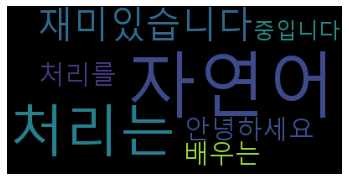

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='malgun').generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
# 단어 빈도수 데이터를 워드 클라우드로 생성
word_counts = dict(word_freq)
word_counts

{'자연어': 4, '처리': 4, '중': 1}

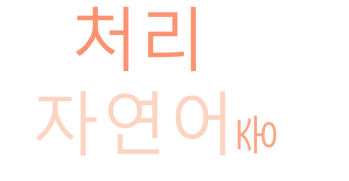

In [34]:
wordcloud = WordCloud(font_path='malgun',
                      background_color='white',
                      colormap = 'Reds',
                      width = 800, height = 400
                     ).generate_from_frequencies(word_counts)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 명사추출함수

In [37]:
from konlpy.tag import Okt

def get_nouns(text):
    nouns = Okt().nouns(text) #명사만 저장
    nouns = [word for word in nouns if len(word) > 1]
    return nouns

In [38]:
text = '''
워드 클라우드는 텍스트 데이터에서 단어의 빈도수를 시각적으로
표현하는 방법 중 하나입니다.
텍스트에서 빈도가 높은 단어일수록 크게 표시되며, 시각화를
통해 단어의 상대적인 중요도를 파악할 수 있습니다.
'''

get_nouns(text)

['워드',
 '클라우드',
 '텍스트',
 '데이터',
 '단어',
 '도수',
 '시각',
 '표현',
 '방법',
 '하나',
 '텍스트',
 '빈도',
 '단어',
 '크게',
 '표시',
 '시각',
 '통해',
 '단어',
 '상대',
 '중요도',
 '파악']